<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Михаил! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

Привет, Марат!

__Изменения__:
- добавил попарные диаграммы рассеяния
- добавил корреляционную матрицу
- добавил исследование исключения коррелирующих признаков (изменение перфоманса моделей на уровне стат погрешности ИМХО)

</div>

<div class="alert alert-success">
<h2>Комментарий ревьюераV2</h2>

Успех 👍:

Привет Михаил!
</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Успех:

Вступление в работу очень важно, так человек, который смотрит твой проект (и на работе в том числе) будет сразу введен в курс дела.
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости.

<div class="alert alert-warning">
Совет:
- кстати есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html), в будущем пригодится )  
</div>
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

Я стараюсь пискать код по [Google style guide](https://github.com/google/styleguide/blob/gh-pages/pyguide.md#s2.2-imports)  
Так а что не так в импортах?
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюераV2</h2>

Успех 👍:

Всё так.  Это на будущее
</div>

In [2]:
RANDOM_STATE = 42

## Откройте и изучите файл

In [3]:
df = pd.read_csv(
    '/datasets/users_behavior.csv',
    dtype={
        'calls': 'int16',
        'minutes': 'float32',
        'messages': 'int16',
        'mb_used': 'float32',
        'is_ultra': 'int8',
    },
)
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40,311.899994,83,19915.419922,0
1,85,516.750000,56,22696.960938,0
2,77,467.660004,86,21060.449219,0
3,106,745.530029,81,8437.389648,1
4,66,418.739990,1,14502.750000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int16  
 1   minutes   3214 non-null   float32
 2   messages  3214 non-null   int16  
 3   mb_used   3214 non-null   float32
 4   is_ultra  3214 non-null   int8   
dtypes: float32(2), int16(2), int8(1)
memory usage: 40.9 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208771,38.281269,17207.673828,0.306472
std,33.236368,234.569870,36.148326,7570.968262,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.574997,9.000000,12491.902588,0.000000
50%,62.000000,430.600006,30.000000,16943.234375,0.000000
75%,82.000000,571.927521,57.000000,21424.699707,1.000000
max,244.000000,1632.060059,224.000000,49745.730469,1.000000


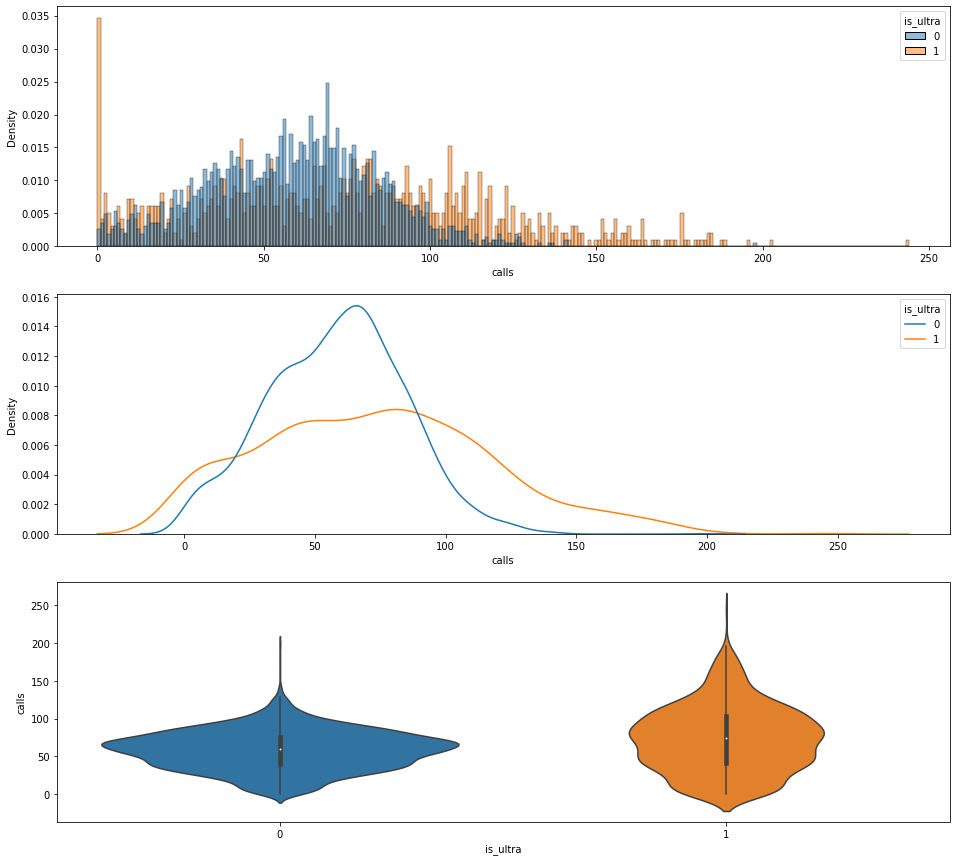

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15))

sns.histplot(
    data=df,
    x='calls',
    hue='is_ultra',
    bins=245,
    stat='density',
    common_norm=False,
    ax=axes[0],
)
sns.kdeplot(
    data=df,
    x='calls',
    hue='is_ultra',
    common_norm=False,
    ax=axes[1],
)
sns.violinplot(
    data=df,
    x='is_ultra',
    y='calls',
    ax=axes[2],
)

plt.show()

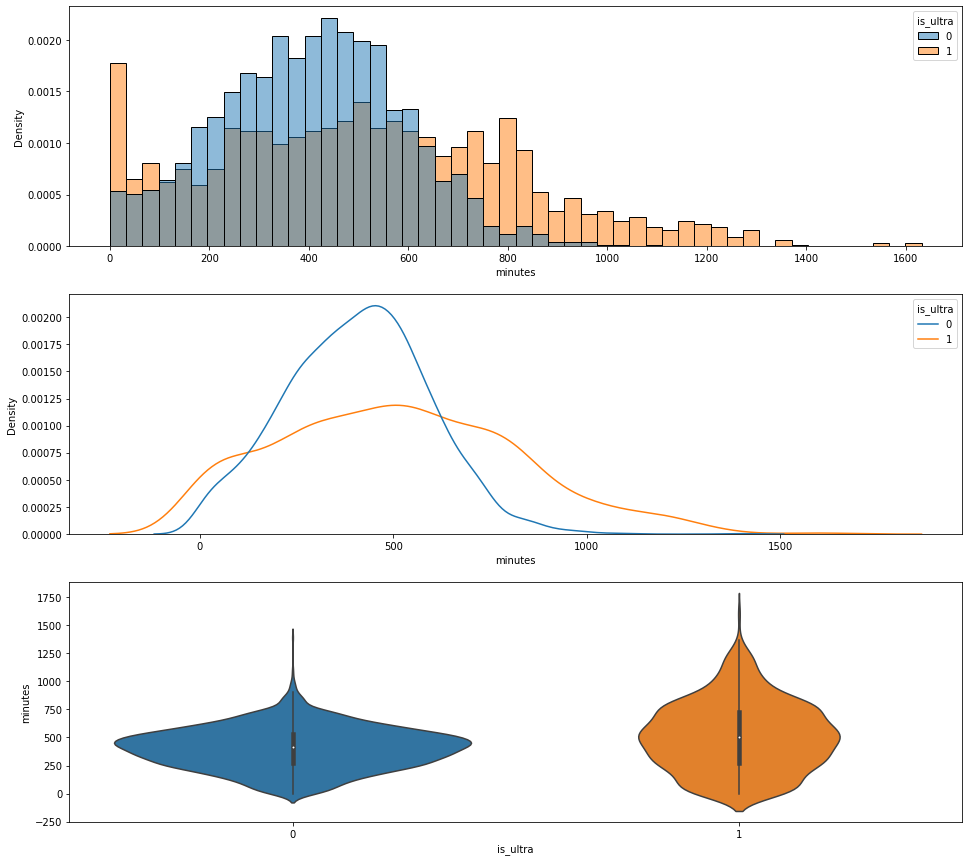

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15))

sns.histplot(
    data=df,
    x='minutes',
    hue='is_ultra',
    bins=50,
    stat='density',
    common_norm=False,
    ax=axes[0],
)
sns.kdeplot(
    data=df,
    x='minutes',
    hue='is_ultra',
    common_norm=False,
    ax=axes[1],
)
sns.violinplot(
    data=df,
    x='is_ultra',
    y='minutes',
    ax=axes[2],
)

plt.show()

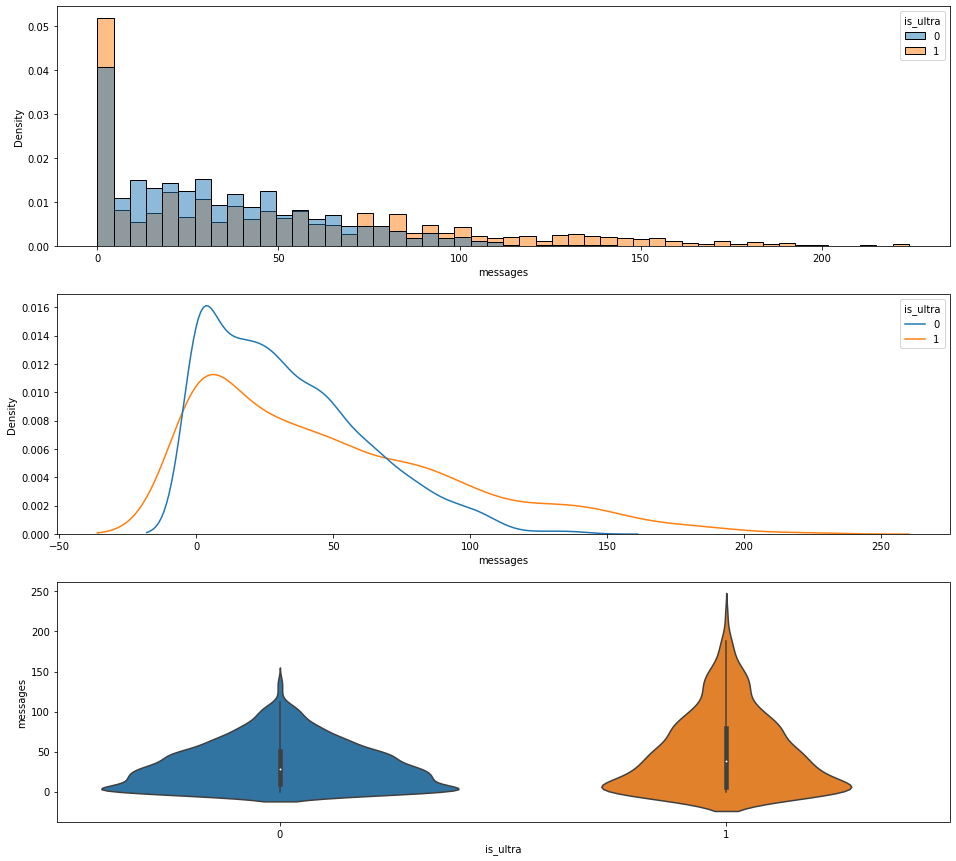

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15))

sns.histplot(
    data=df,
    x='messages',
    hue='is_ultra',
    bins=50,
    stat='density',
    common_norm=False,
    ax=axes[0],
)
sns.kdeplot(
    data=df,
    x='messages',
    hue='is_ultra',
    common_norm=False,
    ax=axes[1],
)
sns.violinplot(
    data=df,
    x='is_ultra',
    y='messages',
    ax=axes[2],
)

plt.show()

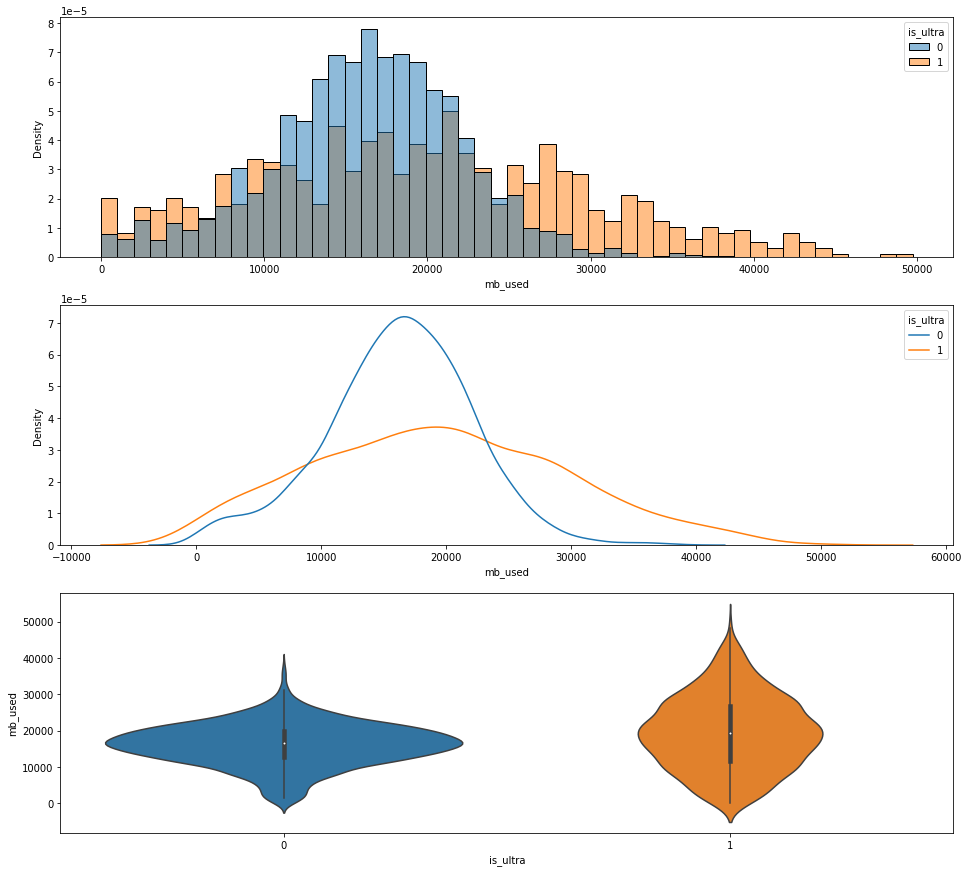

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15))

sns.histplot(
    data=df,
    x='mb_used',
    hue='is_ultra',
    bins=50,
    stat='density',
    common_norm=False,
    ax=axes[0],
)
sns.kdeplot(
    data=df,
    x='mb_used',
    hue='is_ultra',
    common_norm=False,
    ax=axes[1],
)
sns.violinplot(
    data=df,
    x='is_ultra',
    y='mb_used',
    ax=axes[2],
)

plt.show()

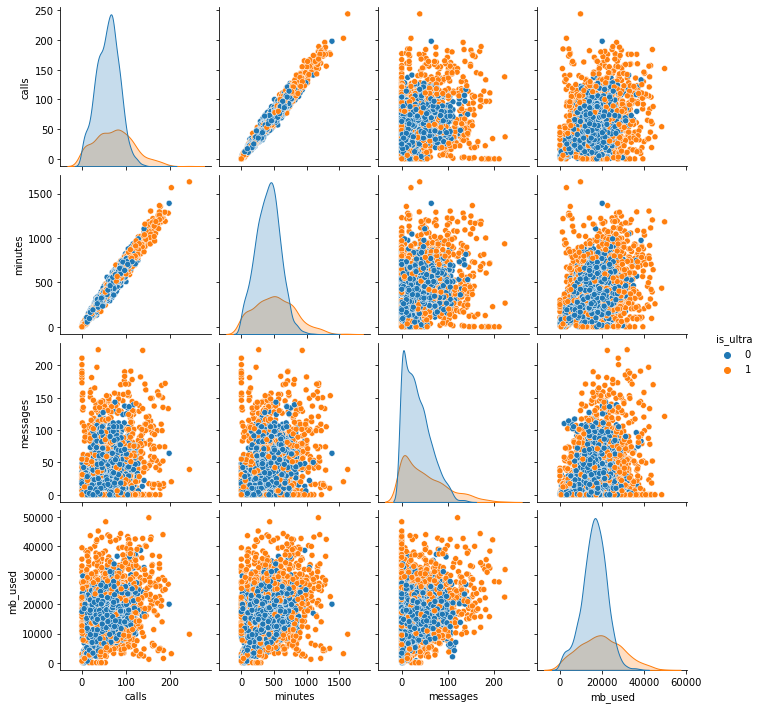

In [10]:
sns.pairplot(df, hue='is_ultra')

<AxesSubplot:>

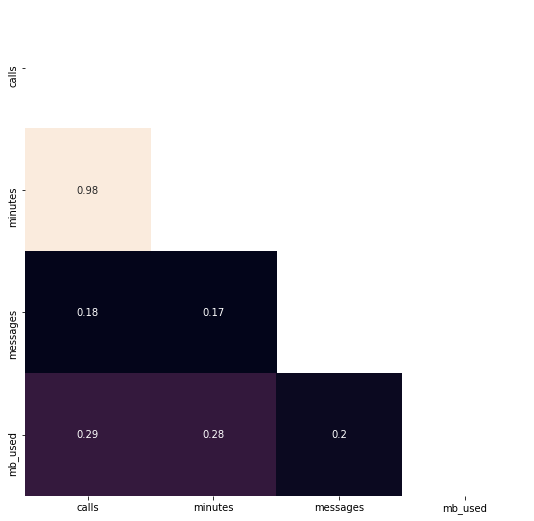

In [11]:
corr = df.drop('is_ultra', axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(corr, mask=mask, annot=True, cbar=False, ax=ax)

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>
Успех:

👍 Данные изучены. Симпатичные графики

И проверить целевой признак на сбалансированность хороший ход, это по сути решение бонусное задание сразу.  Тема дисбаланса как раз тема следующего проекта, тут можно [почитать](https://dyakonov.org/2021/05/27/imbalance/) заранее зачем мы обращаем внимание на это. А [тут](https://habr.com/ru/post/349078/) так ли он страшен  ))

<div class="alert alert-warning">
Совет: 

Можно посмотреть корреляцию признаков. Знаешь что такое мультиколлинеарность, какие два типа проблем возникает, для каких моделей и какие варианты решения?
</div>
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

Спасибо, со статьями ознакомлюсь)

Есть несколько вопросов относительно корреляции:
- Можно ли считать корреляцию для численных __дискретных__ признаков?
- Есть ли какой-нибудь способ посчитать "корреляцию" для __категориальных__ и __ранговых__ признаков?

__Про мультиколлинеарность__ знаю поверхностно. Расскажу, что знаю:
- Как-то плохо на обучение линейных моделей (+ нейросетки) влияет наличие сильно коррелированных признаков. Но как точно не знаю!
- На перфоманс моделей на основе деревьев решений наличие сильно коррелированных признаков вроде влиять не должно. Скорее всего при анализе важности признаков она размоется между всеми коррелированными признаками. Вследствии этого можно сделать неверный вывод.

Буду очень благодарен, если расскажешь или скинешь статьи на тему!))
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюераV2</h2>
Успех:

👍    

Добавлю. 

- Мультиколлиниарность    

Первый момент: мультиколлиниарность проблема линейных моделей - могут переобучаться.... теоретически. Но в логистической, и в линейной регрессиях реализована регуляризация, которая решает проблему мультиколлиниарности признаков. "Деревянные" модели (RF, DT) устойчивы к мультиколлинеарности, а кластеризация тоже почти не зависит от линейных зависимостей. Получается, избавляться от мультиколлинеарности чтобы не переобучаться не обязательно ))

Второй момент: интерпретируемость линейной модели (мы по коеффициентам судим как признаки влияют на таргет), тут  мультиколлинеарность надо убирать.

- Корреляция. Попробую ответить, хотя с таким вопросом лучше обращаться к преподавателю    

Можно ли считать корреляцию для численных дискретных признаков?    

А в чём проблема? Или ты имеешь в виду категориальный признаки типа "цвета" итп?  

Есть ли какой-нибудь способ посчитать "корреляцию" для категориальных и ранговых признаков?

Есть даже понятия такое ранговая корреляция.  

[Есть](https://translated.turbopages.org/proxy_u/en-ru.ru.1c28b812-636dd35c-9a2b3699-74722d776562/https/phik.readthedocs.io/en/latest/) готовая библиотека которое позволяет это сделать.  Ну честно говоря я ей не пользовался )
</div>

## Разбейте данные на выборки

In [12]:
X = df.copy()
y = X.pop('is_ultra')
# нет части для валидации, потому что использую кросс-валидацию
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    stratify=y,
    random_state=RANDOM_STATE,
)

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>
Успех:

Все правильно!

Молодец что знаешь и используешь stratify
</div>

## Исследуйте модели

### Исследование DecisionTreeClassifier

In [13]:
%%time
# ОБА КОРРЕЛИРОВАННЫХ ПРИЗНАКА 'calls' и 'minutes'

# поиск лучших гиперпараметров с кросс-валидацией
search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid={
        'max_depth': np.arange(2, 13),
        'min_weight_fraction_leaf': np.logspace(-3, -1, num=5),
        'min_impurity_decrease': np.logspace(-3, -1, num=5),
    },
    scoring='balanced_accuracy',
    n_jobs=-1,  # не ограничиваем количество используемых ядер процессора
    refit=True,  # после нахождения лучших гиперпараметров обучаем новую модель на всём обучающем наборе
    cv=StratifiedShuffleSplit(
        test_size=0.2,
        random_state=RANDOM_STATE,
    ),
)
search.fit(X_train, y_train)


tree_model_v1 = search.best_estimator_

print('Лучшие гиперпараметры:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')
print(f'Лучший score: {search.best_score_}\n')

y_pred = tree_model_v1.predict(X_test)
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры:
max_depth: 9
min_impurity_decrease: 0.001
min_weight_fraction_leaf: 0.0031622776601683794
Лучший score: 0.742656578734423

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       558
           1       0.57      0.67      0.62       246

    accuracy                           0.75       804
   macro avg       0.71      0.73      0.72       804
weighted avg       0.76      0.75      0.75       804

CPU times: user 24.1 s, sys: 67.6 ms, total: 24.2 s
Wall time: 24.2 s


In [14]:
%%time
# БЕЗ ПРИЗНАКА 'calls'

X_train_drop_calls = X_train.drop('calls', axis=1)
X_test_drop_calls = X_test.drop('calls', axis=1)
# поиск лучших гиперпараметров с кросс-валидацией
search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid={
        'max_depth': np.arange(2, 13),
        'min_weight_fraction_leaf': np.logspace(-3, -1, num=5),
        'min_impurity_decrease': np.logspace(-3, -1, num=5),
    },
    scoring='balanced_accuracy',
    n_jobs=-1,  # не ограничиваем количество используемых ядер процессора
    refit=True,  # после нахождения лучших гиперпараметров обучаем новую модель на всём обучающем наборе
    cv=StratifiedShuffleSplit(
        test_size=0.2,
        random_state=RANDOM_STATE,
    ),
)
search.fit(X_train_drop_calls, y_train)


tree_model_v2 = search.best_estimator_

print('Лучшие гиперпараметры:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')
print(f'Лучший score: {search.best_score_}\n')

y_pred = tree_model_v2.predict(X_test_drop_calls)
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры:
max_depth: 9
min_impurity_decrease: 0.001
min_weight_fraction_leaf: 0.01
Лучший score: 0.7426929923935912

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       558
           1       0.53      0.72      0.61       246

    accuracy                           0.72       804
   macro avg       0.69      0.72      0.69       804
weighted avg       0.75      0.72      0.73       804

CPU times: user 23.2 s, sys: 164 ms, total: 23.4 s
Wall time: 23.4 s


In [15]:
%%time
# БЕЗ ПРИЗНАКА 'minutes'

X_train_drop_minutes = X_train.drop('minutes', axis=1)
X_test_drop_minutes = X_test.drop('minutes', axis=1)
# поиск лучших гиперпараметров с кросс-валидацией
search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid={
        'max_depth': np.arange(2, 13),
        'min_weight_fraction_leaf': np.logspace(-3, -1, num=5),
        'min_impurity_decrease': np.logspace(-3, -1, num=5),
    },
    scoring='balanced_accuracy',
    n_jobs=-1,  # не ограничиваем количество используемых ядер процессора
    refit=True,  # после нахождения лучших гиперпараметров обучаем новую модель на всём обучающем наборе
    cv=StratifiedShuffleSplit(
        test_size=0.2,
        random_state=RANDOM_STATE,
    ),
)
search.fit(X_train_drop_minutes, y_train)


tree_model_v3 = search.best_estimator_

print('Лучшие гиперпараметры:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')
print(f'Лучший score: {search.best_score_}\n')

y_pred = tree_model_v3.predict(X_test_drop_minutes)
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры:
max_depth: 9
min_impurity_decrease: 0.001
min_weight_fraction_leaf: 0.0031622776601683794
Лучший score: 0.7419768570966176

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       558
           1       0.58      0.71      0.64       246

    accuracy                           0.75       804
   macro avg       0.72      0.74      0.72       804
weighted avg       0.77      0.75      0.76       804

CPU times: user 21.4 s, sys: 39.9 ms, total: 21.5 s
Wall time: 21.5 s


### Исследовние RandomForestClassifier

In [16]:
%%time
# ОБА КОРРЕЛИРОВАННЫХ ПРИЗНАКА 'calls' и 'minutes'

# поиск лучших гиперпараметров с кросс-валидацией
search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid={
        'max_depth': np.arange(2, 13),
        'min_weight_fraction_leaf': np.logspace(-3, -1, num=5),
        'min_impurity_decrease': np.logspace(-3, -1, num=5),
    },
    scoring='balanced_accuracy',
    n_jobs=-1,  # не ограничиваем количество используемых ядер процессора
    refit=True,  # после нахождения лучших гиперпараметров обучаем новую модель на всём обучающем наборе
    cv=StratifiedShuffleSplit(
        test_size=0.2,
        random_state=RANDOM_STATE,
    ),
)
search.fit(X_train, y_train)


forest_model_v1 = search.best_estimator_

print('Лучшие гиперпараметры:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')
print(f'Лучший score: {search.best_score_}\n')

y_pred = forest_model_v1.predict(X_test)
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры:
max_depth: 10
min_impurity_decrease: 0.001
min_weight_fraction_leaf: 0.0031622776601683794
Лучший score: 0.7534512056967146

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       558
           1       0.67      0.65      0.66       246

    accuracy                           0.79       804
   macro avg       0.76      0.75      0.76       804
weighted avg       0.79      0.79      0.79       804

CPU times: user 10min 23s, sys: 4.97 s, total: 10min 28s
Wall time: 10min 28s


In [17]:
%%time
# БЕЗ ПРИЗНАКА 'calls'

X_train_drop_calls = X_train.drop('calls', axis=1)
X_test_drop_calls = X_test.drop('calls', axis=1)
# поиск лучших гиперпараметров с кросс-валидацией
search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid={
        'max_depth': np.arange(2, 13),
        'min_weight_fraction_leaf': np.logspace(-3, -1, num=5),
        'min_impurity_decrease': np.logspace(-3, -1, num=5),
    },
    scoring='balanced_accuracy',
    n_jobs=-1,  # не ограничиваем количество используемых ядер процессора
    refit=True,  # после нахождения лучших гиперпараметров обучаем новую модель на всём обучающем наборе
    cv=StratifiedShuffleSplit(
        test_size=0.2,
        random_state=RANDOM_STATE,
    ),
)
search.fit(X_train_drop_calls, y_train)


forest_model_v2 = search.best_estimator_

print('Лучшие гиперпараметры:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')
print(f'Лучший score: {search.best_score_}\n')

y_pred = forest_model_v2.predict(X_test_drop_calls)
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры:
max_depth: 8
min_impurity_decrease: 0.001
min_weight_fraction_leaf: 0.001
Лучший score: 0.7545173167179156

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       558
           1       0.68      0.62      0.65       246

    accuracy                           0.79       804
   macro avg       0.76      0.74      0.75       804
weighted avg       0.79      0.79      0.79       804

CPU times: user 8min 39s, sys: 4.53 s, total: 8min 44s
Wall time: 8min 44s


In [18]:
%%time
# БЕЗ ПРИЗНАКА 'minutes'

X_train_drop_minutes = X_train.drop('minutes', axis=1)
X_test_drop_minutes = X_test.drop('minutes', axis=1)
# поиск лучших гиперпараметров с кросс-валидацией
search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE),
    param_grid={
        'max_depth': np.arange(2, 13),
        'min_weight_fraction_leaf': np.logspace(-3, -1, num=5),
        'min_impurity_decrease': np.logspace(-3, -1, num=5),
    },
    scoring='balanced_accuracy',
    n_jobs=-1,  # не ограничиваем количество используемых ядер процессора
    refit=True,  # после нахождения лучших гиперпараметров обучаем новую модель на всём обучающем наборе
    cv=StratifiedShuffleSplit(
        test_size=0.2,
        random_state=RANDOM_STATE,
    ),
)
search.fit(X_train_drop_minutes, y_train)

forest_model_v3 = search.best_estimator_

print('Лучшие гиперпараметры:')
for param, value in search.best_params_.items():
    print(f'{param}: {value}')
print(f'Лучший score: {search.best_score_}\n')

y_pred = forest_model_v3.predict(X_test_drop_minutes)
print(classification_report(y_test, y_pred))

Лучшие гиперпараметры:
max_depth: 12
min_impurity_decrease: 0.001
min_weight_fraction_leaf: 0.0031622776601683794
Лучший score: 0.7502994011976047

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       558
           1       0.68      0.66      0.67       246

    accuracy                           0.80       804
   macro avg       0.76      0.76      0.76       804
weighted avg       0.80      0.80      0.80       804

CPU times: user 8min 19s, sys: 4.8 s, total: 8min 24s
Wall time: 8min 24s


<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Успех:

Здорово что использован GridSearchCV, это уже другой уровень и верный датасет подан в .fit. Хотя для лучшего понимания процесса моделирования изнутри, было бы полезно использовать цикл

<div class="alert alert-warning">
Совет:

- Можно добавить график, хорошо оформленный график украсит проект. Тут на графике можно посмотреть как при изменении гиперпараметров меняется точность на train и validation датасете (для этого собираем наши метрики на валидации и train в списки, а затем по ним обычный plt.plot()) Такой способ используют чтобы лучше отследить переобучение, но для этого стоит взять пернебор по max_depth поглубже
- Когда что-то долго крутиться, можно использовать  %%time - ставишь на самый вверх ячейки с кодом, время выполнения которого хочешь замерить, может не знаешь.  Быстрее не станет, но все будут видеть стоит ли ждать не отходя от ПК или можно сходить чаек поставить ))
</div>
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

Цикл процесса валидации и кросс-валидации мне ясен)

График, который ты описываешь, может быть полезен при настройке одного гиперпараметра. Можно ещё сделать матрицы при иследовании двух гиперпараметров. А вот что делать, если исследуешь 3+ гиперпараметра? В таком случае визуализировать становиться крайне сложно. (Да, можно брать двумерные срезы, но это тоже весьма громоздко) Есть тут какое-то решение __best practice__?

Про профилирование кода мне известно, не знал, что это может быть полезно в таком разрезе))
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюераV2</h2>

Совет 🤔:

Это я предложил сделать в учебных целях и именно для дерева решений, чтобы наблюдать как в какой-то момент, по мере увеличения глубины деревьев будет происходить процесс переобучения. Когда идёт перебор по более чем двум гиперпараметрам, можно что-то придумывать, но это того не стоит
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера</h2>

Совет: 

Если есть желание можешь ответить на вопросики ))

- Как назвать ситуацию, когда на валидации при увеличении глубины дерева (модель DT), метрика качества стала снижаться? Как по твоему в это же время вела себя эта же метрика на train?

- Насколько знаю вы еще под капот моделям не заглядывали, но может знаешь почему обычно RF показывает более высокие результаты из выбранных?
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

- Скорее всего это связано с __переобучением__. На train метрика будет ухудшаться.
- На курсе ещё нет. Но у меня уже приличный опыт взаимодействия с моделями на основе деревьев. RF менее подвержен переобучению. То есть в нём же для обучения каждого дерева берётся рандомная выборка признаков (по умолчанию sqrt(n_features)) и ещё выборка для обучения выбирается через __bootstrap__. Ну и используется усредние вероятностей по каждому дереву. Математически это не выведу, но интуитивно это такие методы __регуляризации__.
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюераV2</h2>

Успех:

Дополню чуть

1. Верно, переобучение. На train точность растет вплоть до 100%.
2. Да, в RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап как ты написал), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.
</div>

## Проверьте модель на тестовой выборке

In [20]:
y_pred = forest_model_v1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       558
           1       0.67      0.65      0.66       246

    accuracy                           0.79       804
   macro avg       0.76      0.75      0.76       804
weighted avg       0.79      0.79      0.79       804



<div class="alert alert-danger">
<h2>Комментарий ревьюера</h2>

К данному этапу мы должны подойти с одной выбранной моделью. Михаил, о логике использования датасетов:

1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров).  И выбираем лучшую модель. 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена модель с конкретными гиперпараметрами. Использование тестовой выборки, чтобы еще раз посмотреть на модели - это нарушение логической цепочки моделирования. 

А в таком виде, может сложиться впечатление что мы на тестовой по прежнему что то выбираем, но выбор сделан, и если лучшая на валидации покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала.

[Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.

<div class="alert alert-warning">
Вопросики и совет:

- А можешь предложить как нам использовать полученный результат в бизнесе? Как нам на этих прогнозах сделать деньги?
- Михаил, в качестве бонуса можешь вывести еще несколько метрик своей модели - precision, recall, F1 и confussion matrix) Все есть в sklearn)
</div>
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

В статье описано, что нужно использовать предложенный тобой пайплайн, но не сказано __почему__.  Считаю, что вопрос спорный и требует обсуждения!

С одной стороны можно делать выбор лучшей модели и на валидации. Типа мы можем выбирать так же как и с выбором гиперпараметров, не смотря на тип модели (DT/RF/GBDT и тд.). С другой стороны на соревнованиях выбирают победителя именно по перфомансу на test. Так почему же не выбирать и здесь на test?!

- Теперь мы можем выделить клиентов, которые с бОльшей веротностью перейдут на новый тариф. И мы можем предложить его им. И при этом не делать широкую рассылку, которая будет спамом для остальных клиентов.
- Precision, Recall, F1-score и так уже есть в classification_report. Да, могу вывести confusion_matrix и не только).  UPD: здесь стоит старая версия sklearn. Не хочу в ней ковыряться, чтобы постоить графики(
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюераV2</h2>

Совет 🤔:

Это делается для того, чтобы мы даже незначительным образом не "подгонялись" под тестовую выборку. Ведь на train модели обучаются, по валидиации подгоняются гиперпараметры. Эти данные модели "знают". А test (out-of-sample) это уже моделирование прогноза на реальных данных и ситуации когда у нас есть уже лучшая модель (в рельности у нас же не может быть несоклько прогнозов, что то в любом случаи надо выбирать). Вот поэтому такая двухуровневая проверка на подгонку. Кроме того использование мноих моделей с разными гиперпараметрами это тоже подгонка, поэтому выбирая одну и тестируя только ее, мы тем самым боремся с подгонкой через использование многих-многих моделей, когда результат хорош не потому что мы данные почистили хорошо, моделировали правильно итд итп, а потому что из многих моделей хоть какая то случайно "сыграет".  Если тебя и это не убедит тогда мои аргументы кончились )
</div>

<div class="alert alert-success">
<h2>Комментарий ревьюераV2</h2>

Успех:

Верно, мы сэкономим время и деньги, ведь просто предлагать переходить всем это лишние траты (не говоря о клиентах, которые уходят, если слишком назойливо им что-то предлагать, что для них явно не подходит).
</div>

## (бонус) Проверьте модели на адекватность

In [19]:
# что имеется в виду? ввести неадекватные входные данные?

<div class="alert alert-warning">
<h2>Комментарий ревьюера</h2>

Совет:

Михаил, бонусное на то и бонусное, но можешь попробовать его решить с моей подсказкой.    

Колючевое это помнить  что у нас дисбаланс в таргете (нулей гораздно больше чем единиц) и четко понимать как считается accuracy.

В чем смысл проверки модели на адекватность  при дисбалансе? Вот смотри - обучили мы какую то модель, которая на test показывает 90% accuraсy. Шикарная модель скажем мы. А если в датасете у нас в метках таргета единичек 99,9% (допустим тренируем на данных где 1 это "кирпич упал на голову человеку когда он вышел из дома"), а нулей 0,1% ("не упал")?! Все также утверждаем что наша модель шикарная?! Нет, потому что всегда можно предсказывать что не упадает (единички) и accuracy будет равна 99,9%

Вот и тут мы сравниваем нашу обученную модель с примитивным прогнозом самого частого таргета. Какой у нас самый частый класс? Нули. Так посмотри accuracy_score target_test и ряда из одних нулей. Сколько будет?.

При проверке на адекватность модели, рекомендую ознакомиться с [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей и сделает тоже самое что я описал на словах
</div>

<div class="alert alert-info">
<h2>Комментарий студента</h2>

Проблема была в том, чтобы понять, что значит "проверить на адекватность". Это очень размытое понятие!  

Не, таким я заниматься не хочу.
</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюераV2</h2>

Совет:

Тут даже заниматься особо нечем. Тут логика такая - у нас есть данные и мы видим что доля нулей в таргете около 69%, это значит что мы не проводя никакого анализа, моделирования итп итд, можем постоянно предсказывать 0 и получить точность около 69%. Вот эту accuracy в 69% мы и должны побить, иначе окажется что наша модель не лучше наивного прогноза самого частого класса.

С   DummyClassifier это выглядит  так:

    DummyClassifier(strategy='most_frequent', random_state=1)  
задаем константную модель, которая будет предсказывать по most_frequent - самый частый класс

    .fit(features_train, target_train)
тут модель смотри на самый частый класс в  target_train - типо "обучение"

    .predict(features_test)
    .score(features_test, target_test)
проогнозирует везде самый частый класс в features_test и считает score

Получаем тот же результат: acc около 69%.
</div>

<div class="alert alert-info">
<h2>Комментарий ревьюера</h2>

Михаил, у тебя старательно выполненная работа, все четко, осмысленно. Выводы присутствуют, с комментированием кода тоже никаких проблем нет, твоих объяснений достаточно для понимания коллегами хода твоих мыслей. 

Замечания на будущее:

- Было бы замечательно, в выводе немножко о данных, работе с ними (пусть даже никакой работы и не было), моделировании и полученных результатах. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.
    
Обязательное к исправлению:

- к моменту проверки качества прогноза на тесте, приходим с уже одной выбранной моделью с лучшими гиперпараметрами выбранными на валидации

Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
</div>

<div class="alert alert-info">
<h2>Комментарий ревьюераV2</h2>

Спасибо за работу!    

Красное исправлено, многие желтые советы использованы, на  вопросы есть ответы  (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

Отличная работа Михаил. Желаю успехов в дальнейшей учебе!
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75